In [1]:
# 데이터 불러오기
import seaborn as sns # seaborn을 불러오고 SNS로 축약
iris = sns.load_dataset('iris')  # iris라는 변수명으로 Iris data를 download

X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의
y = iris['species']

In [2]:
# y data를 범주형으로 변환
from sklearn.preprocessing import LabelEncoder    # LabelEncoder() method를 불러옴
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # species 열의 문자열을 categorical 값으로 전환

In [3]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [4]:
# 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# Classification Tree
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

[Text(111.60000000000001, 190.26, 'X[3] <= 0.75\nentropy = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.75\nentropy = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[3] <= 1.75\nentropy = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

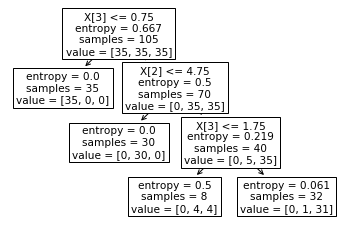

In [5]:
tree.plot_tree(dtc.fit(X_train,y_train))

In [6]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9777777777777777


In [6]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

NameError: name 'metrics' is not defined

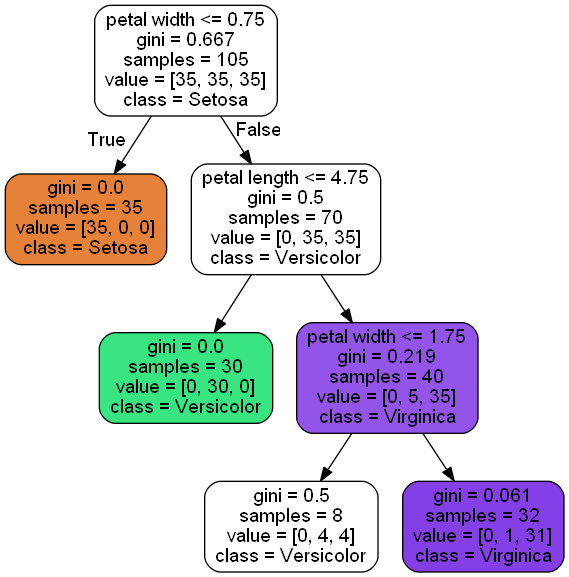

In [7]:
# Graphic
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장


from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력